# Groupby

We often want to do **computations *within* groups**:

1. Interesting statistics in themselves (e.g. average employment rate in municipalities)
1. Needed for further calculations (e.g. with-in municipality deviation of employment rate from mean or trend)

This is also called **split-apply-combine**: 

1. **split**: divide the dataset into units
2. **apply**: compute the needed variables
3. **combine**: merge the new variables back onto the original dataset

**Table of contents**<a id='toc0_'></a>    
- 1. [Groupby](#toc1_)    
  - 1.1. [Aggregations](#toc1_1_)    
- 2. [Transformations](#toc2_)    
- 3. [More flexiblity](#toc3_)    
- 4. [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Groupby](#toc0_)

**Example data:**

In [2]:
RAS = pd.read_csv('data/RAS200_long.csv')
RAS = RAS.sort_values(['municipality','year']) # sort by first municipality then year
RAS.head()

,municipality,year,emp_rate,part_rate
0,Aabenraa,2008,74.6,76.3
1,Aabenraa,2009,71.6,75.2
2,Aabenraa,2010,70.9,74.5
3,Aabenraa,2011,70.2,74.0
4,Aabenraa,2012,69.5,73.7


**Mean within municipality:**

In [3]:
RAS.groupby('municipality')[['emp_rate','part_rate']].mean().head(5)

,emp_rate,part_rate
municipality,,
Aabenraa,72.51250,75.30000
Aalborg,70.81250,74.22500
Aarhus,70.24375,73.00625
Albertslund,70.20000,73.99375
Allerød,82.26250,83.86250


**Year-to-year differences with-in municipalities:**

In [4]:
RAS[['diff_emp_rate','diff_part_rate']] = RAS.groupby('municipality')[['emp_rate','part_rate']].diff()
RAS.head(20)

,municipality,year,emp_rate,part_rate,diff_emp_rate,diff_part_rate
0,Aabenraa,2008,74.6,76.3,NaN,NaN
1,Aabenraa,2009,71.6,75.2,-3.0,-1.1
2,Aabenraa,2010,70.9,74.5,-0.7,-0.7
3,Aabenraa,2011,70.2,74.0,-0.7,-0.5
4,Aabenraa,2012,69.5,73.7,-0.7,-0.3
5,Aabenraa,2013,69.4,73.4,-0.1,-0.3
6,Aabenraa,2014,70.1,73.4,0.7,0.0
7,Aabenraa,2015,70.7,73.7,0.6,0.3
8,Aabenraa,2016,72.0,74.7,1.3,1.0
9,Aabenraa,2017,72.9,75.5,0.9,0.8


**Correlation of employment rate and participation rate:**

In [5]:
corss = RAS.groupby('municipality')['diff_emp_rate'].corr(RAS['diff_part_rate'])
mean_corr = corss.mean()
print(f'{mean_corr = :.3f}')

mean_corr = 0.868


Plot correlation for each municipality:

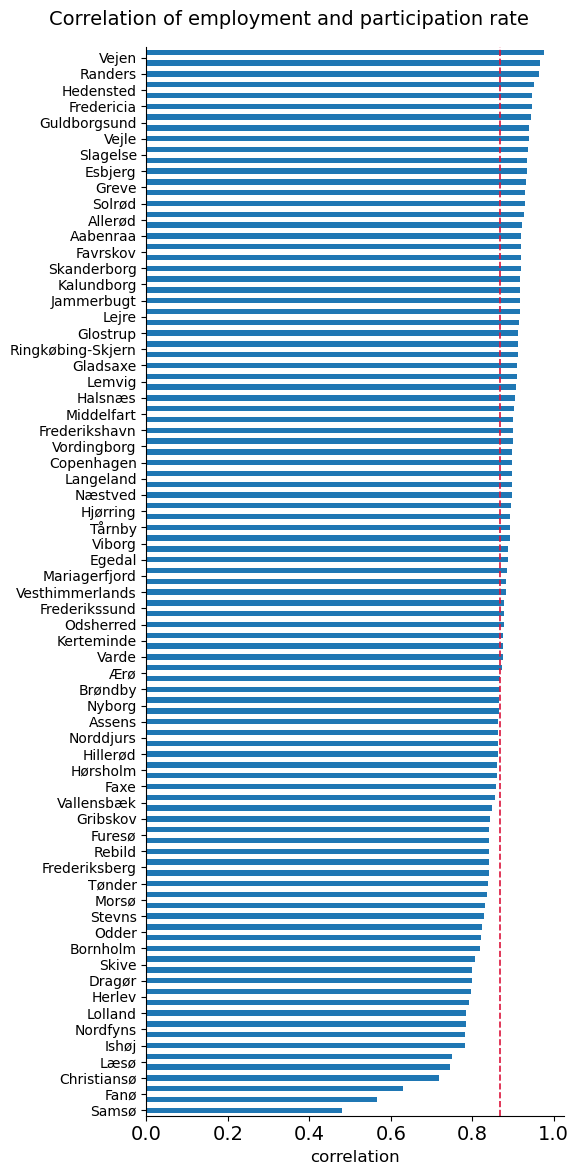

In [6]:
corss = corss.sort_values()

fig, ax = plt.subplots(figsize=(6, 12))

# horizontal bar chart
ax.barh(corss.index, corss.values,height=0.5)

# certical line for mean correlation
ax.axvline(mean_corr, color="crimson", linestyle="--", linewidth=1.2, label=f"Mean = {mean_corr:.2f}")

# label and limits
ax.set_xlabel("correlation",fontsize=12)

ax.set_yticks(range(len(corss.index)))
ax.set_yticks(np.arange(len(corss.index))*1.5)
ax.set_yticklabels(corss.index,fontsize=10,linespacing=20)
ax.set_ylim(-0.5,len(corss.index)-0.5)

# remove grid lines and spines
ax.grid(False)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# figure title
fig.suptitle("Correlation of employment and participation rate",fontsize=14)
fig.tight_layout()

### 1.1. <a id='toc1_1_'></a>[Aggregations](#toc0_)

We can do multiple calculations at once:

In [7]:
RAS.groupby('municipality')['emp_rate'].agg(['mean','std']).head(5)

,mean,std
municipality,,
Aabenraa,72.51250,2.221674
Aalborg,70.81250,2.490482
Aarhus,70.24375,2.361347
Albertslund,70.20000,2.867752
Allerød,82.26250,1.552149


We can also name them ourselves:

In [8]:
RAS_agg = RAS.groupby('municipality').agg(emp_rate_first=('emp_rate','first'),emp_rate_last=('emp_rate','last'))
RAS_agg.head(5)

,emp_rate_first,emp_rate_last
municipality,,
Aabenraa,74.6,75.3
Aalborg,73.2,75.5
Aarhus,72.6,74.2
Albertslund,73.1,75.1
Allerød,83.8,84.7


Which municipalities had the largest increase in the employment rate?

In [9]:
RAS_agg['emp_rate_diff'] = RAS_agg['emp_rate_last'] - RAS_agg['emp_rate_first']
RAS_agg = RAS_agg.sort_values('emp_rate_diff',ascending=False)
RAS_agg['emp_rate_diff'][:10]

municipality
Christiansø      19.1
Samsø             6.7
Bornholm          6.4
Fanø              5.6
Ærø               5.1
Copenhagen        4.3
Frederiksberg     4.1
Odsherred         3.7
Læsø              3.2
Esbjerg           3.2
Name: emp_rate_diff, dtype: float64

## 2. <a id='toc2_'></a>[Transformations](#toc0_)

Calculate demeaned employment rate using `transforma`:

In [10]:
emp_rate_within_mean = RAS.groupby(['municipality'])['emp_rate'].transform('mean')
RAS['emp_rate_demeaned'] = RAS['emp_rate'] - emp_rate_within_mean
RAS.head()

,municipality,year,emp_rate,part_rate,diff_emp_rate,diff_part_rate,emp_rate_demeaned
0,Aabenraa,2008,74.6,76.3,NaN,NaN,2.0875
1,Aabenraa,2009,71.6,75.2,-3.0,-1.1,-0.9125
2,Aabenraa,2010,70.9,74.5,-0.7,-0.7,-1.6125
3,Aabenraa,2011,70.2,74.0,-0.7,-0.5,-2.3125
4,Aabenraa,2012,69.5,73.7,-0.7,-0.3,-3.0125


**Note:** Transformation preserves the shape of the dataset.

**Plot deviations from mean:**

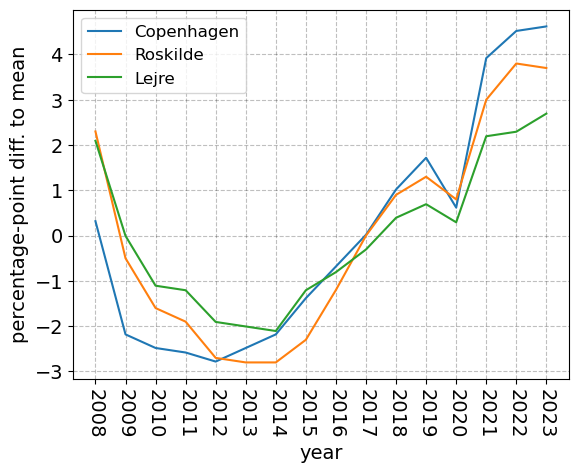

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

municipalities = ['Copenhagen','Roskilde','Lejre']
for m in municipalities:
    RAS.set_index('municipality').xs(m).plot(x='year',y='emp_rate_demeaned',ax=ax,label=m)

ax.set_ylabel('percentage-point diff. to mean');
ax.set_xlabel('year')
years = RAS.year.unique()
ax.set_xticks(years)
ax.set_xticklabels(years,rotation=270)
ax.legend(frameon=True,fontsize=12);

## 3. <a id='toc3_'></a>[More flexiblity](#toc0_)

We can also **apply our own functions**. E.g.:

In [12]:
def my_mean(x):
    return np.sum(x,axis=0)/x.size

Here in `.agg` applied column by column:

In [13]:
RAS.groupby('municipality')[['emp_rate','part_rate']].agg(my_mean).head()

,emp_rate,part_rate
municipality,,
Aabenraa,72.51250,75.30000
Aalborg,70.81250,74.22500
Aarhus,70.24375,73.00625
Albertslund,70.20000,73.99375
Allerød,82.26250,83.86250


Here in `.transform` applied column by column:

In [14]:
RAS.groupby('municipality')[['emp_rate','part_rate']].transform(my_mean).head()

,emp_rate,part_rate
0,72.5125,75.3
1,72.5125,75.3
2,72.5125,75.3
3,72.5125,75.3
4,72.5125,75.3


Here in `.apply()` applied to the whole dataframe:

In [15]:
def my_weighted_mean(df):
    x = 0.5*df['emp_rate'] + 0.5*df['part_rate']
    return my_mean(x)

y = RAS.groupby('municipality')[['emp_rate','part_rate']].apply(my_weighted_mean).rename('my_var')
y.head()

municipality
Aabenraa       73.906250
Aalborg        72.518750
Aarhus         71.625000
Albertslund    72.096875
Allerød        83.062500
Name: my_var, dtype: float64

Afterwards this can be joined with the original data set:

In [16]:
RAS_ = RAS.copy()
RAS_.set_index('municipality').join(y,how='left') # many-to-one left join

,year,emp_rate,part_rate,diff_emp_rate,diff_part_rate,emp_rate_demeaned,my_var
municipality,,,,,,,
Aabenraa,2008,74.6,76.3,NaN,NaN,2.0875,73.906250
Aabenraa,2009,71.6,75.2,-3.0,-1.1,-0.9125,73.906250
Aabenraa,2010,70.9,74.5,-0.7,-0.7,-1.6125,73.906250
Aabenraa,2011,70.2,74.0,-0.7,-0.5,-2.3125,73.906250
Aabenraa,2012,69.5,73.7,-0.7,-0.3,-3.0125,73.906250
...,...,...,...,...,...,...,...
Ærø,2019,69.3,72.7,-0.8,0.0,1.2125,69.328125
Ærø,2020,69.7,72.6,0.4,-0.1,1.6125,69.328125
Ærø,2021,71.6,73.2,1.9,0.6,3.5125,69.328125


## 4. <a id='toc4_'></a>[Summary](#toc0_)

The main takeaways are:

1. With-in group calculations with `.groupby`
1. Aggregations with `.agg`
1. Transformations with `.transform`
1. Flexilibity with `.apply` (but slower)